# COVID-19 AUSTRIA GRAPHS

In [1]:
import sys
import os
from osgeo import ogr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

In [2]:
qgis_path = r"C:\OSGeo4W64\apps\qgis"
QgsApplication.setPrefixPath(qgis_path, True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r"C:\OSGeo4W64\apps\qgis\python\plugins")
project = QgsProject.instance()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:\OSGeo4W64\apps\qgis/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/Marcelo/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/Marcelo/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [3]:
import urllib.request
url = 'https://data.biogeo.ucdavis.edu/data/diva/adm/AUT_adm.zip'
filename = 'map/AUT_adm.zip'
urllib.request.urlretrieve(url, filename)

('map/AUT_adm.zip', <http.client.HTTPMessage at 0x2140f99b160>)

In [4]:
import zipfile
filename = 'map/AUT_adm.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('map')

In [5]:
path = "map/AUT_adm1.shp"
map_layer = QgsVectorLayer(path, 'AUSTRIA map', 'ogr')

pr = map_layer.dataProvider() # need to create a data provider
pr.addAttributes([QgsField("",  QVariant.Int)]) # define/add field data type
map_layer.updateFields()

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


Download csv file

In [6]:
import urllib.request
url = 'https://raw.githubusercontent.com/covid19-eu-zh/covid19-eu-data/master/dataset/covid-19-at.csv'
filename = 'covid_data/covid-19-at.csv'
urllib.request.urlretrieve(url, filename)

('covid_data/covid-19-at.csv', <http.client.HTTPMessage at 0x2140f9bfa58>)

Get most recent data from csv file

In [7]:
import csv
import datetime
from datetime import date

today = date.today()
today = today.strftime("%y-%m-%d")
print("Today's date:", today)

safe_date = date.today()-datetime.timedelta(2)
safe = safe_date.strftime("%y-%m-%d")
print("Safe date:", safe)

date_time_str = '2018-06-29T08:15:27'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S')

with open('covid_data/covid-19-at.csv', 'r') as i, open('covid_data/covid-19-austria.csv', 'w', newline='') as o:
    r = csv.reader(i, delimiter=',')
    writer = csv.writer(o)
    writer.writerow(["country", "name", "cases", "recovered", "deaths", "tests", "hospitalized", "intensive_care", "datetime"])
    #for row in r:
    #    if row[8] == "2020-05-09T15:00:00": 
    #        writer.writerow(row)
    #        print(row)
    max_value = date_time_obj
    #most recent date
    for row in r:
        if today in row[8]:
            date_time = row[8]
            date_time_object = datetime.datetime.strptime(date_time, '%Y-%m-%dT%H:%M:%S')
            if date_time_object > max_value: 
                max_value = date_time_object
    print("Most recent date: ", max_value)
    
                
                
                
with open('covid_data/covid-19-at.csv', 'r') as i, open('covid_data/covid-19-austria.csv', 'w', newline='') as o:
    r = csv.reader(i, delimiter=',')
    writer = csv.writer(o)
    writer.writerow(["country", "name", "cases", "recovered", "deaths", "tests", "hospitalized", "intensive_care", "datetime"])
                
    #create csv with most recent data           
    for row in r:
        if today in row[8]:
            date_time = row[8]
            date_time_object = datetime.datetime.strptime(date_time, '%Y-%m-%dT%H:%M:%S')
            if date_time_object == max_value: 
                writer.writerow(row)
                print(row)    
        

        

Today's date: 20-05-31
Safe date: 20-05-29
Most recent date:  2020-05-31 15:30:00
['AT', 'Burgenland', '342', '325', '11', '12953', '2', '0', '2020-05-31T15:30:00']
['AT', 'KÃ¤rnten', '414', '398', '13', '17104', '0', '0', '2020-05-31T15:30:00']
['AT', 'Vorarlberg', '898', '866', '19', '21763', '0', '0', '2020-05-31T15:30:00']
['AT', 'Salzburg', '1220', '1196', '38', '33275', '0', '0', '2020-05-31T15:30:00']
['AT', 'Steiermark', '1836', '1645', '147', '50817', '6', '0', '2020-05-31T15:30:00']
['AT', 'OberÃ¶sterreich', '2296', '2215', '60', '62819', '7', '0', '2020-05-31T15:30:00']
['AT', 'NiederÃ¶sterreich', '2866', '2673', '100', '69621', '22', '10', '2020-05-31T15:30:00']
['AT', 'Wien', '3229', '2855', '172', '106863', '53', '14', '2020-05-31T15:30:00']
['AT', 'Tirol', '3537', '3420', '108', '73319', '7', '3', '2020-05-31T15:30:00']
['AT', '', '16638', '15593', '668', '448534', '97', '27', '2020-05-31T15:30:00']


In [8]:
csv_path = "file:covid_data/covid-19-austria.csv?delimiter=(',')"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


In [9]:
joinName = 'name'
targetName = 'NAME_1'

joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

## Data in Graphs

In [10]:
dict = []

for feature in map_layer.getFeatures():
    if feature['NAME_1']:
        state = feature['NAME_1']
        if feature['Data_deaths']:
            death = feature['Data_deaths']
        else:
            death = 0
        if feature['Data_cases']:
            confirmed = feature['Data_cases']
        else:
            confirmed = 0
        if feature['Data_recovered']:
            recovered = feature['Data_recovered']
        else:
            recovered = 0
        if feature['Data_tests']:
            tests = feature['Data_tests']
        else:
            tests = 0
        if feature['Data_hospitalized']:
            hospitalized = feature['Data_hospitalized']
        else:
            hospitalized = 0
        if feature['Data_intensive_care']:
            intensive_care = feature['Data_intensive_care']
        else:
            intensive_care = 0
        
    e = {'Name': state, 'Confirmed': confirmed, 'Death': death, 'Recovered': recovered, 'Tests': tests, 'Hospitalized': hospitalized, 'Intensive Care': intensive_care }
    dict.append(e)

In [11]:
size = len(dict)-5

c = sorted(dict, key = lambda i: i['Confirmed'],reverse=True)
d = sorted(dict, key = lambda i: i['Death'],reverse=True)
r = sorted(dict, key = lambda i: i['Recovered'],reverse=True)
t = sorted(dict, key = lambda i: i['Tests'],reverse=True)
h = sorted(dict, key = lambda i: i['Hospitalized'],reverse=True)
i = sorted(dict, key = lambda i: i['Intensive Care'],reverse=True)

top5confirmed = c[0:5]
top5death = d[0:5]
top5recovered = r[0:5]
top5tests = t[0:5]
top5hospitalized = h[0:5]
top5intensive_care = i[0:5]

bottom5confirmed = c[size:]
bottom5death = d[size:]
bottom5recovered = r[size:]
bottom5tests = r[size:]
bottom5hospitalized = h[size:]
bottom5intensive_care = i[size:]


### Top 5 Cases Confirmed

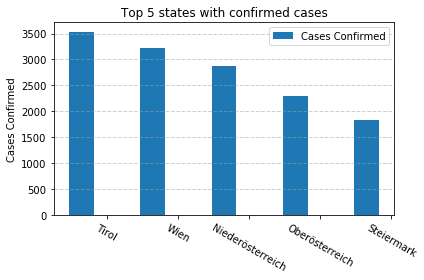

In [12]:
delta1 = [c[0]['Confirmed'],c[1]['Confirmed'],c[2]['Confirmed'],c[3]['Confirmed'],c[4]['Confirmed']]
states = [c[0]['Name'],c[1]['Name'],c[2]['Name'],c[3]['Name'],c[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, align='center', label='Cases Confirmed')


plt.ylabel('Cases Confirmed')
plt.title('Top 5 states with confirmed cases')
plt.xticks(index + bar_width,states, rotation=-30)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_cases_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()



### Bottom 5 Cases Confirmed

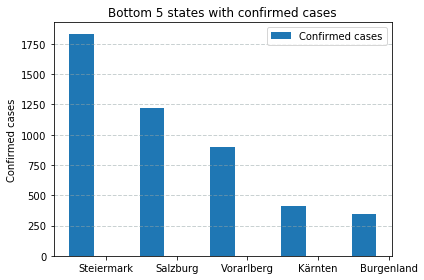

In [13]:
delta1 = [bottom5confirmed[0]['Confirmed'],bottom5confirmed[1]['Confirmed'],bottom5confirmed[2]['Confirmed'],bottom5confirmed[3]['Confirmed'],bottom5confirmed[4]['Confirmed']]
states = [bottom5confirmed[0]['Name'],bottom5confirmed[1]['Name'],bottom5confirmed[2]['Name'],bottom5confirmed[3]['Name'],bottom5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Confirmed cases')

plt.ylabel('Confirmed cases')
plt.title('Bottom 5 states with confirmed cases')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_cases_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Top 5 Deaths

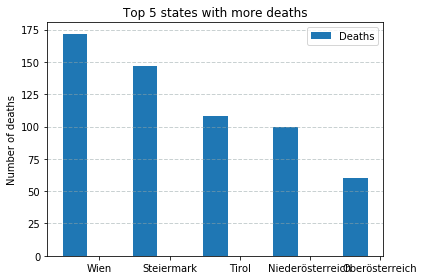

In [14]:
delta1 = [top5death[0]['Death'],top5death[1]['Death'],top5death[2]['Death'],top5death[3]['Death'],top5death[4]['Death']]
states = [top5death[0]['Name'],top5death[1]['Name'],top5death[2]['Name'],top5death[3]['Name'],top5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths')

plt.ylabel('Number of deaths')
plt.title('Top 5 states with more deaths')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_deaths_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Bottom 5 Mortes

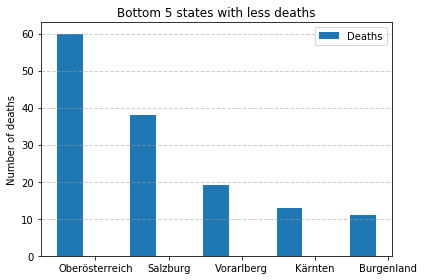

In [15]:
delta1 = [bottom5death[0]['Death'],bottom5death[1]['Death'],bottom5death[2]['Death'],bottom5death[3]['Death'],bottom5death[4]['Death']]
states = [bottom5death[0]['Name'],bottom5death[1]['Name'],bottom5death[2]['Name'],bottom5death[3]['Name'],bottom5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths')

plt.ylabel('Number of deaths')
plt.title('Bottom 5 states with less deaths')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_deaths_confirmed.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Top 5 Recovered cases

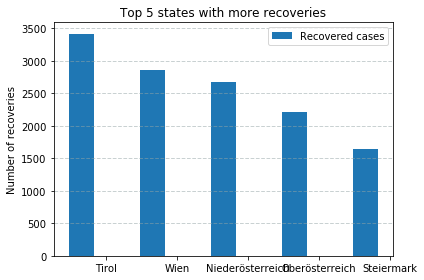

In [16]:
delta1 = [top5recovered[0]['Recovered'],top5recovered[1]['Recovered'],top5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [top5recovered[0]['Name'],top5recovered[1]['Name'],top5recovered[2]['Name'],top5recovered[3]['Name'],top5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Recovered cases')

plt.ylabel('Number of recoveries')
plt.title('Top 5 states with more recoveries')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_recovered.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Bottom 5 Recovered Cases

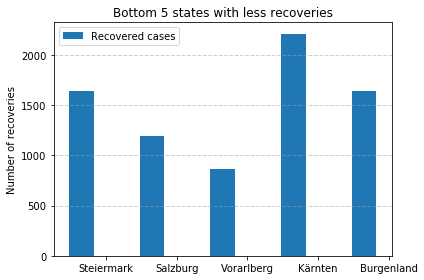

In [17]:
delta1 = [bottom5recovered[0]['Recovered'],bottom5recovered[1]['Recovered'],bottom5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [bottom5recovered[0]['Name'],bottom5recovered[1]['Name'],bottom5recovered[2]['Name'],bottom5recovered[3]['Name'],bottom5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Recovered cases')

plt.ylabel('Number of recoveries')
plt.title('Bottom 5 states with less recoveries')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_recovered.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Top 5 Tests

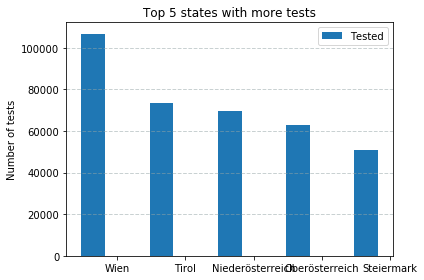

In [18]:
delta1 = [top5tests[0]['Tests'],top5tests[1]['Tests'],top5tests[2]['Tests'],top5tests[3]['Tests'],top5tests[4]['Tests']]
states = [top5tests[0]['Name'],top5tests[1]['Name'],top5tests[2]['Name'],top5tests[3]['Name'],top5tests[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Tested')

plt.ylabel('Number of tests')
plt.title('Top 5 states with more tests')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/top5_tests.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

### Bottom 5 Tests

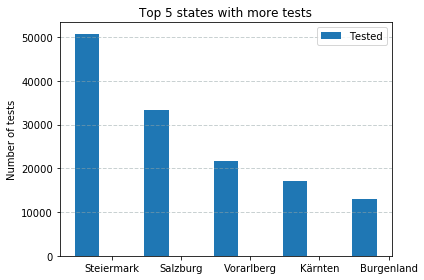

In [19]:
delta1 = [bottom5tests[0]['Tests'],bottom5tests[1]['Tests'],bottom5tests[2]['Tests'],bottom5tests[3]['Tests'],bottom5tests[4]['Tests']]
states = [bottom5tests[0]['Name'],bottom5tests[1]['Name'],bottom5tests[2]['Name'],bottom5tests[3]['Name'],bottom5tests[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Tested')

plt.ylabel('Number of tests')
plt.title('Top 5 states with more tests')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/bottom5_tests.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

## Deaths in AUSTRIA by state

In [20]:
# Import Data
df = pd.read_csv("covid_data/covid-19-austria.csv")

print(df.sort_values('cases', ascending=False))
df2 = df[['name','deaths']]
print(df[['name','deaths']])
print(df2['name'])

  country              name  cases  recovered  deaths   tests  hospitalized  \
9      AT               NaN  16638      15593     668  448534            97   
8      AT             Tirol   3537       3420     108   73319             7   
7      AT              Wien   3229       2855     172  106863            53   
6      AT  Niederösterreich   2866       2673     100   69621            22   
5      AT    Oberösterreich   2296       2215      60   62819             7   
4      AT        Steiermark   1836       1645     147   50817             6   
3      AT          Salzburg   1220       1196      38   33275             0   
2      AT        Vorarlberg    898        866      19   21763             0   
1      AT           Kärnten    414        398      13   17104             0   
0      AT        Burgenland    342        325      11   12953             2   

   intensive_care             datetime  
9              27  2020-05-31T15:30:00  
8               3  2020-05-31T15:30:00  
7      

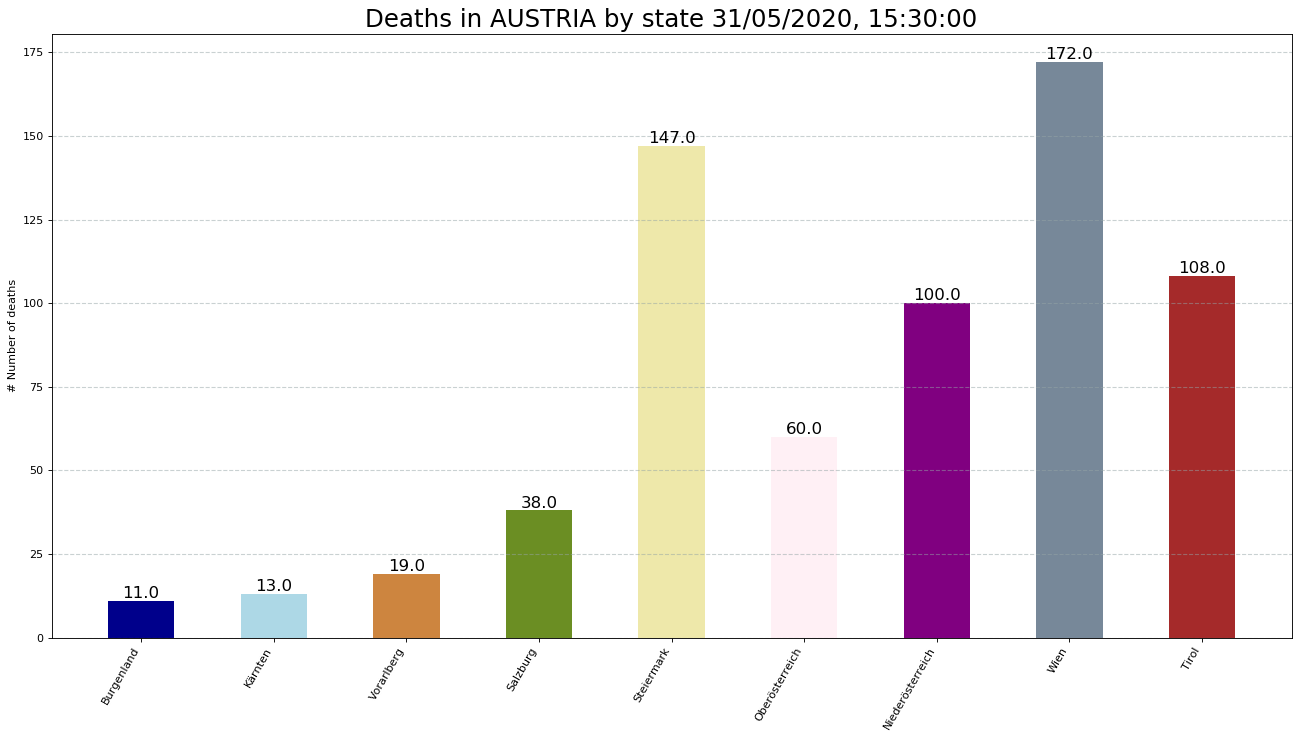

In [21]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','deaths']]
n = df['deaths'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['deaths'].tolist()[0:9]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Deaths in AUSTRIA by state "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/deaths.png', dpi=300, format='png')
plt.show()

## Confirmed cases in AUSTRIA by state

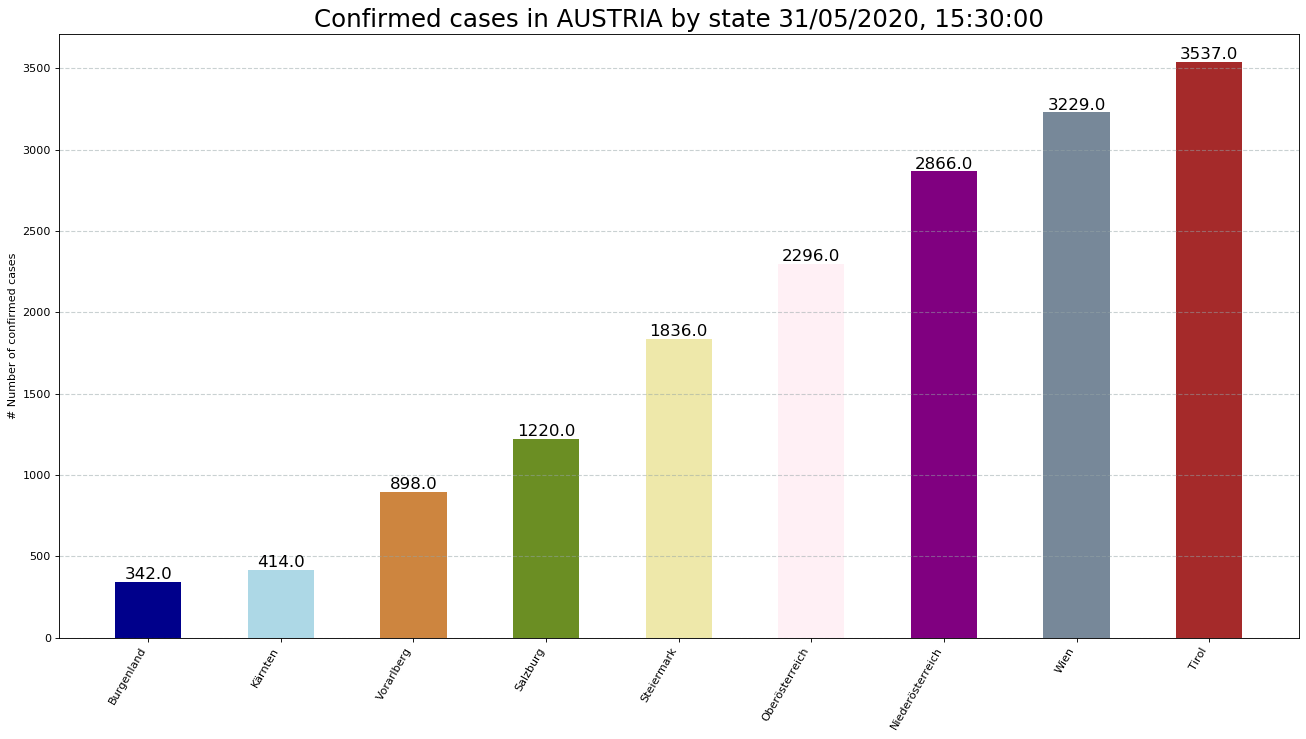

In [22]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','cases']]
n = df['cases'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['cases'].tolist()[0:9]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Confirmed cases in AUSTRIA by state "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('# Number of confirmed cases')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/confirmed_cases.png', dpi=300, format='png')
plt.show()

## Recoveries in AUSTRIA by state

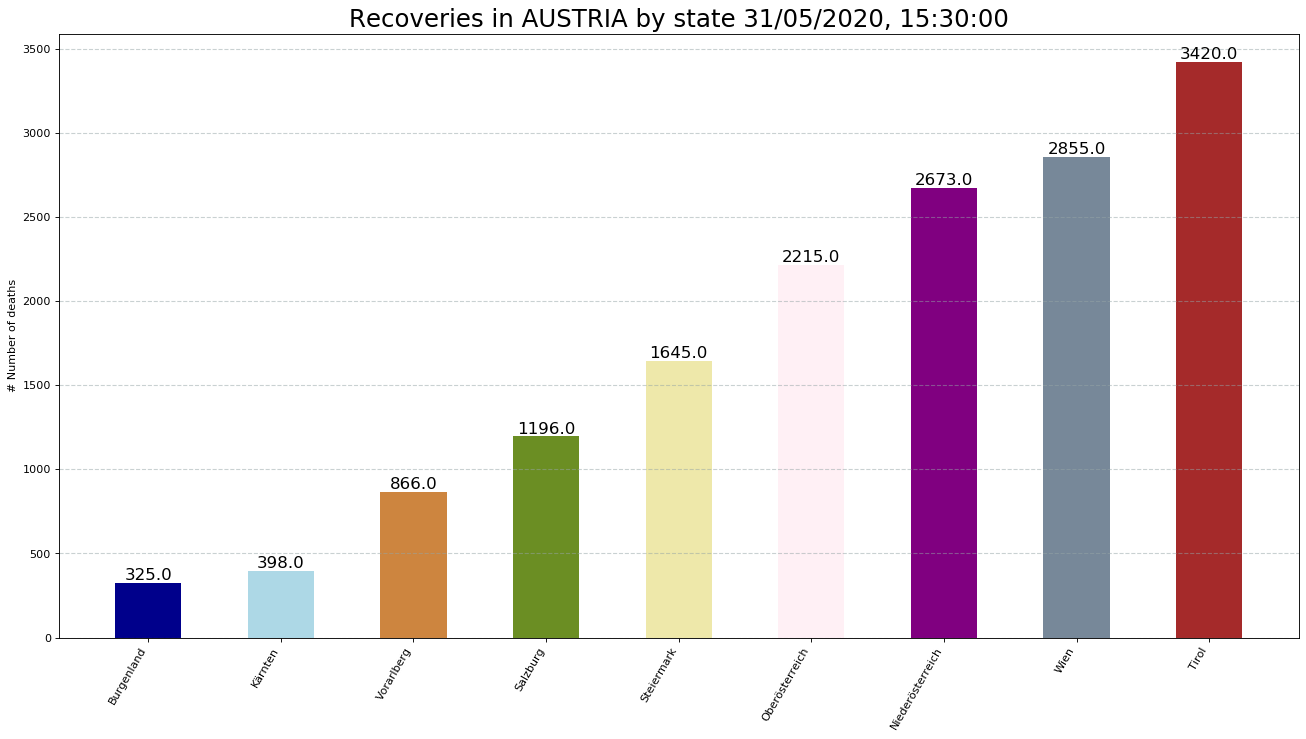

In [23]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','recovered']]
n = df['recovered'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['recovered'].tolist()[0:9]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Recoveries in AUSTRIA by state "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/confirmed_cases.png', dpi=300, format='png')
plt.show()

## Hospitalizations in AUSTRIA by state

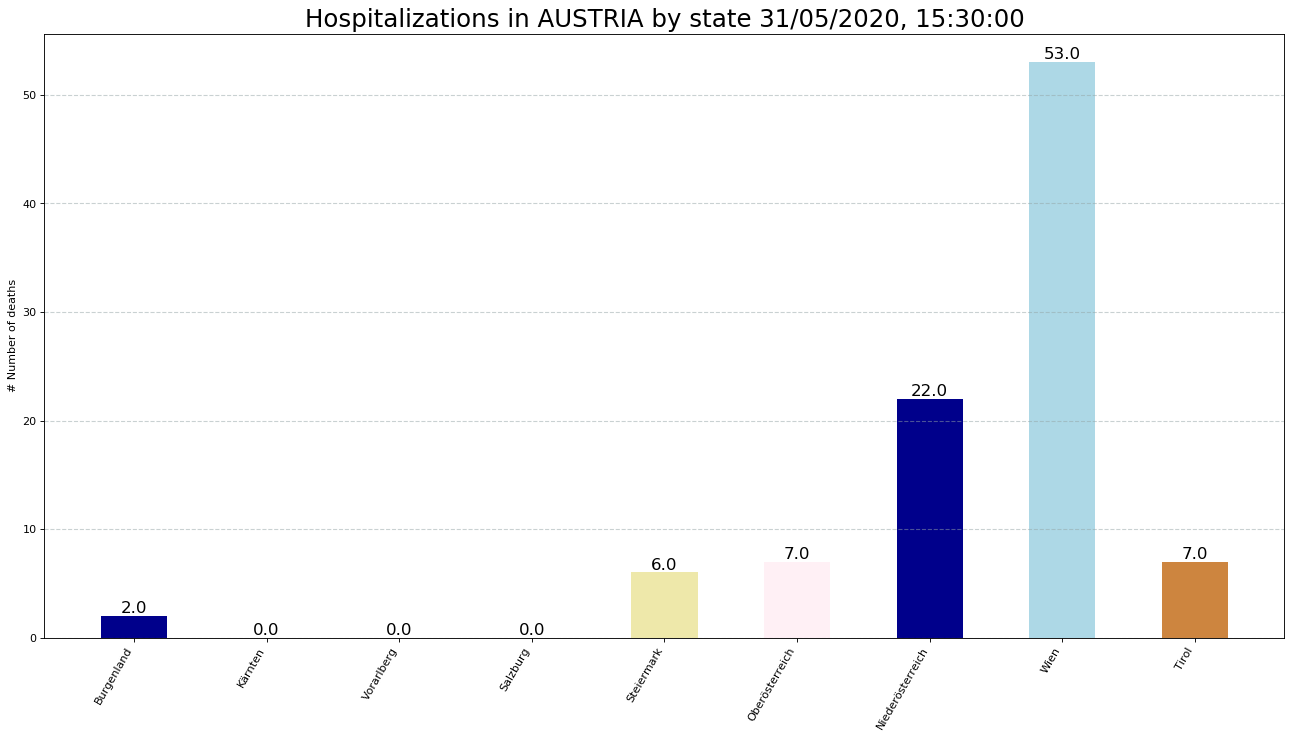

In [24]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','hospitalized']]
n = df['hospitalized'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['hospitalized'].tolist()[0:9]

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Hospitalizations in AUSTRIA by state "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/hospitalized.png', dpi=300, format='png')
plt.show()

## Intesive Care in AUSTRIA by state

               name  intensive_care
0        Burgenland               0
1           Kärnten               0
2        Vorarlberg               0
3          Salzburg               0
4        Steiermark               0
5    Oberösterreich               0
6  Niederösterreich              10
7              Wien              14
8             Tirol               3
9               NaN              27
[0, 0, 0, 0, 0, 0, 10, 14, 3]


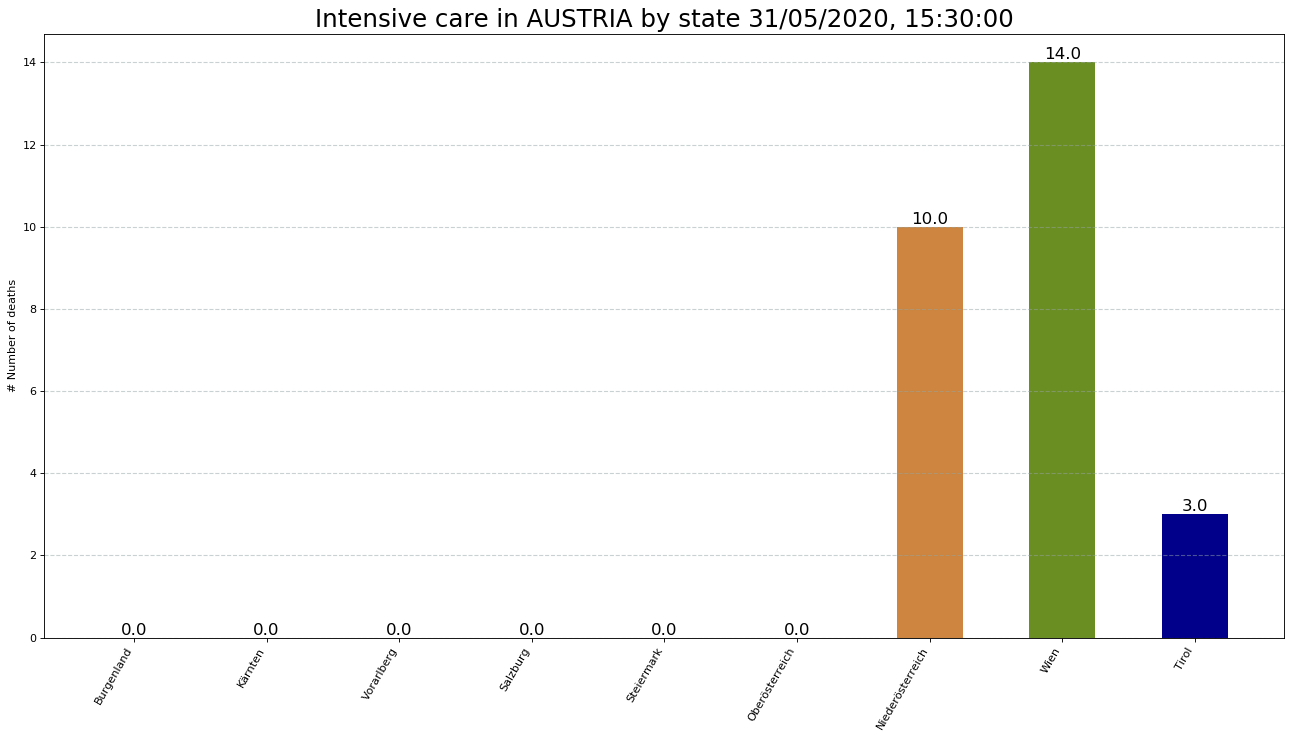

In [25]:
import random

# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

#print(df_raw)

# Prepare Data
df = df_raw[['name','intensive_care']]
print(df)
n = df['intensive_care'].unique().__len__()-1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

#print(df['name'].tolist(), df['deaths'])

x = df['name'].tolist()[0:9]
y = df['intensive_care'].tolist()[0:9]

print(y)

# Plot Bars
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x, y, color=c, width=.5)
for i, val in enumerate(y):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Decoration
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Intensive care in AUSTRIA by state "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('# Number of deaths')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/hospitalized.png', dpi=300, format='png')
plt.show()

In [26]:
# Import Data
df_raw = pd.read_csv("covid_data/covid-19-austria.csv")

# Prepare Data

name = df_raw['name'].tolist()[0:9]
intensive_care = df_raw['intensive_care'].tolist()[0:9]
cases = df_raw['cases'].tolist()[0:9]
deaths = df_raw['deaths'].tolist()[0:9]
recovered = df_raw['recovered'].tolist()[0:9]
hospitalized = df_raw['hospitalized'].tolist()[0:9]
tests = df_raw['tests'].tolist()[0:9]

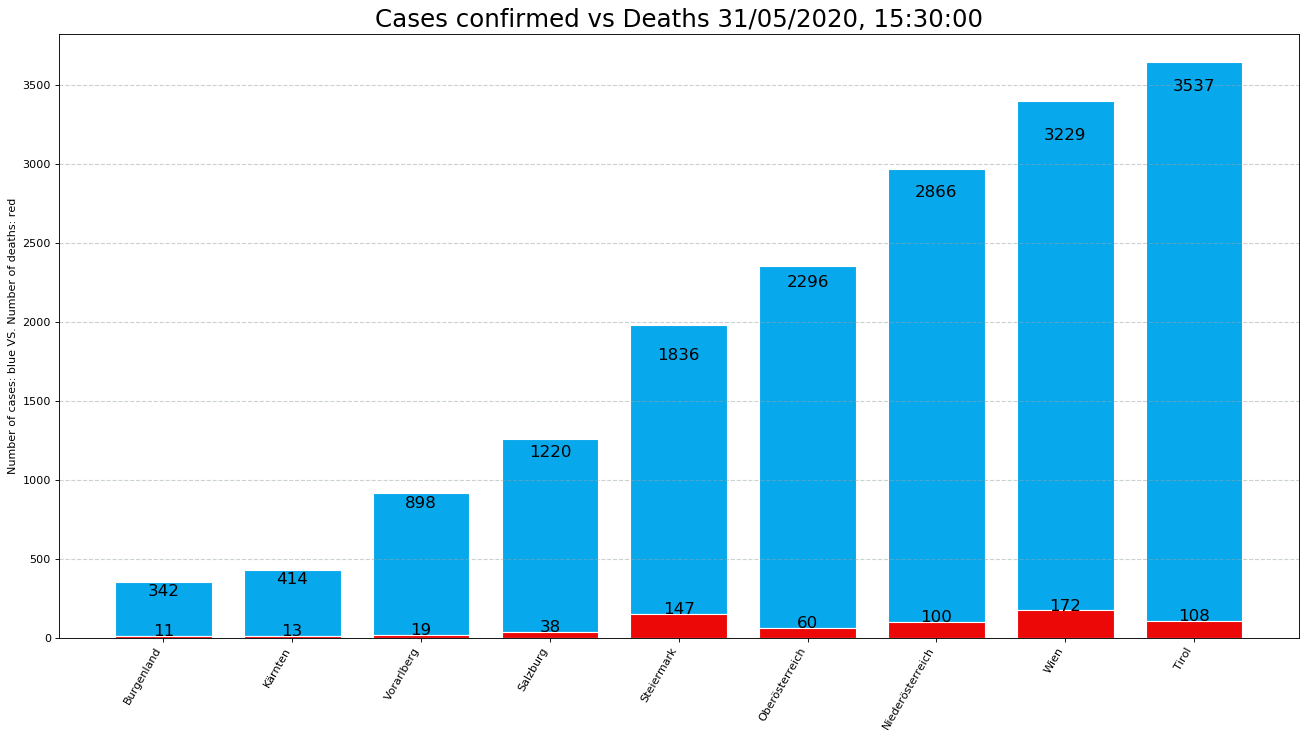

In [27]:
# Values of each group
bars1 = cases
bars2 = deaths
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis

 
# Names of group and bar width
names = name
barWidth = 0.75


plt.figure(figsize=(20,10), dpi= 80)

plt.bar(names, bars1, bottom=bars2, color='#08a8ed', edgecolor='white', width=barWidth)
plt.bar(names, bars2, color='#ed0808', edgecolor='white', width=barWidth)
 
for i, val in enumerate(bars2):
    plt.text(i, val, int(val), horizontalalignment='center', fontdict={'fontweight':500, 'size':15})

for i, val in enumerate(bars1):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='top', fontdict={'fontweight':500, 'size':15})
 
    
# Show graphic
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Cases confirmed vs Deaths "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('Number of cases: blue VS. Number of deaths: red')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/cases_vs_deaths.png', dpi=300, format='png')
plt.show()

[-325, -398, -866, -1196, -1645, -2215, -2673, -2855, -3420]


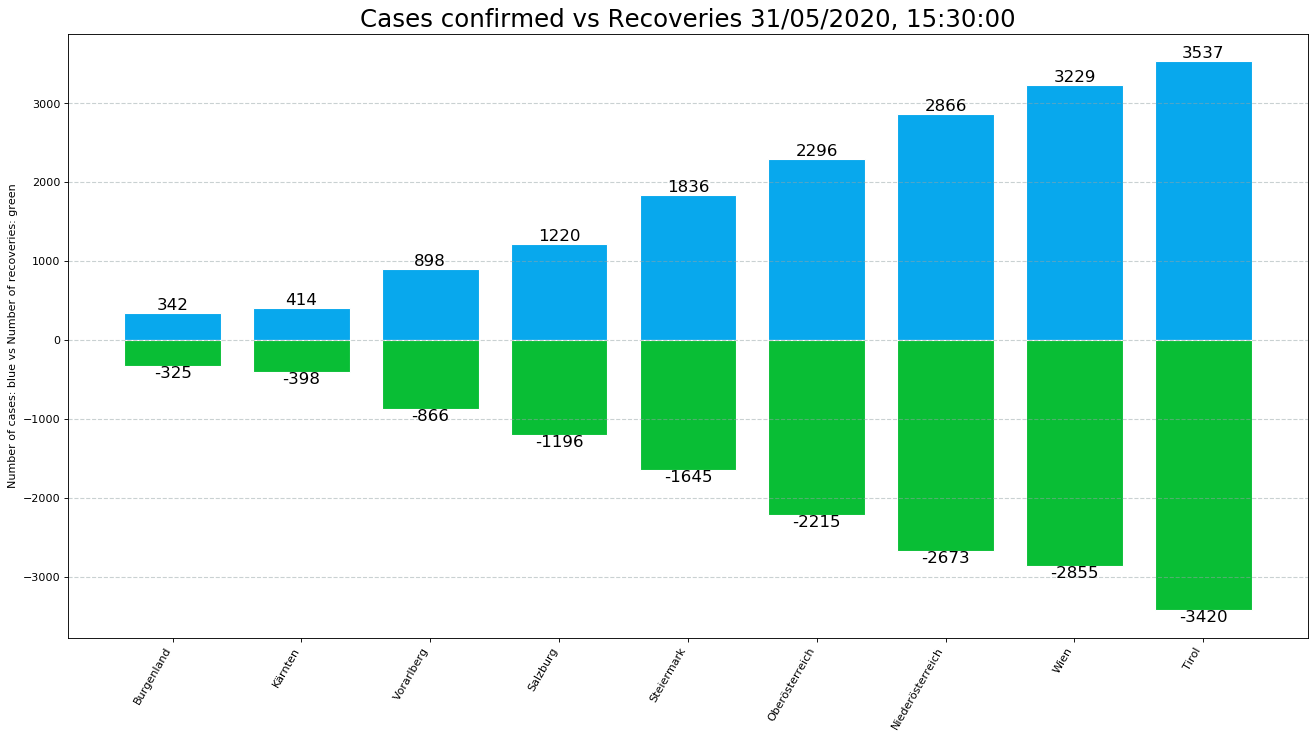

In [28]:
mylist = recovered
myneglist = [ -x for x in mylist]
print(myneglist)

# Values of each group
bars1 = cases
bars2 = myneglist
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis

 
# Names of group and bar width
names = name
barWidth = 0.75


plt.figure(figsize=(20,10), dpi= 80)

plt.bar(names, bars1, color='#08a8ed', edgecolor='white', width=barWidth)
plt.bar(names, bars2, color='#09be35', edgecolor='white', width=barWidth)
 
for i, val in enumerate(bars2):
    plt.text(i, val, int(val), horizontalalignment='center',verticalalignment='top', fontdict={'fontweight':500, 'size':15})

for i, val in enumerate(bars1):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})
 
    
# Show graphic
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Cases confirmed vs Recoveries "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('Number of cases: blue vs Number of recoveries: green')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/cases_vs_recovered.png', dpi=300, format='png')
plt.show()

[0, 0, 0, 0, 0, 0, -10, -14, -3]


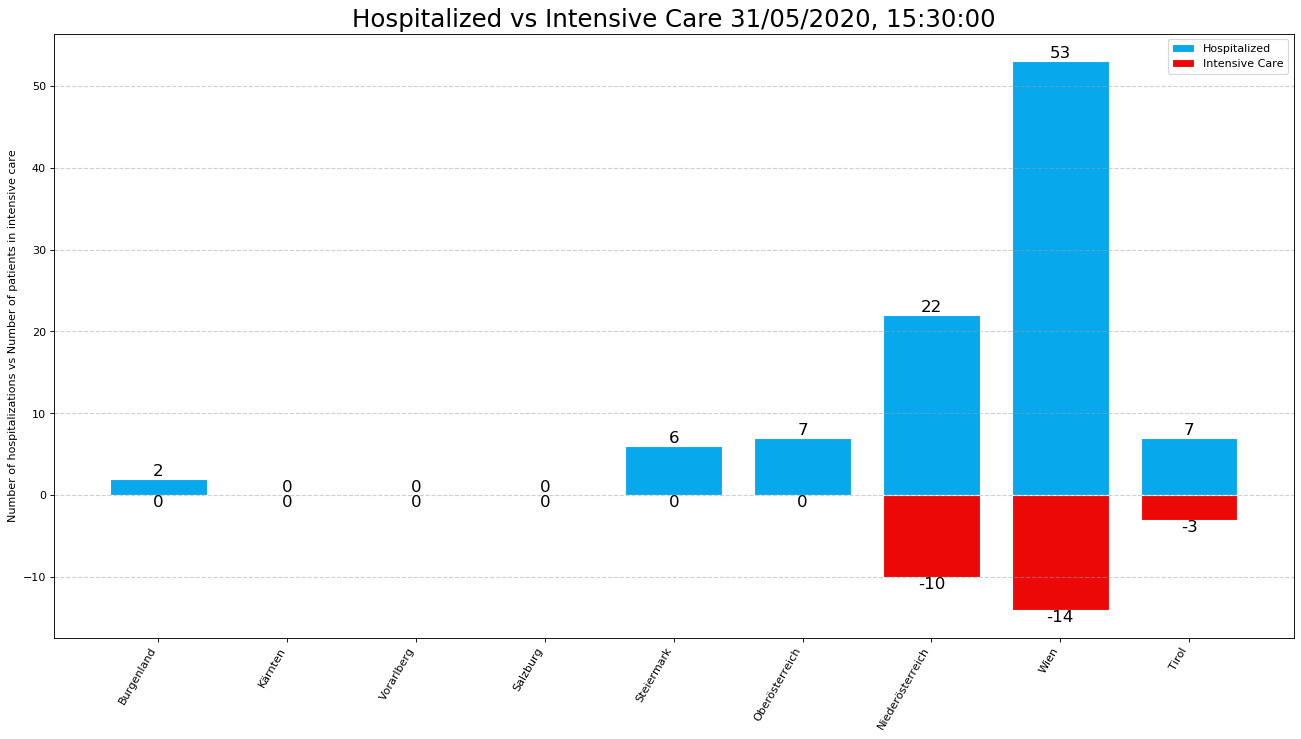

In [29]:
mylist = intensive_care
myneglist = [ -x for x in mylist]
print(myneglist)

# Values of each group
bars1 = hospitalized
bars2 = myneglist
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis

 
# Names of group and bar width
names = name
barWidth = 0.75


plt.figure(figsize=(20,10), dpi= 80)

plt.bar(names, bars1, color='#08a8ed', edgecolor='white', width=barWidth, label='Hospitalized')
plt.bar(names, bars2, color='#ed0808', edgecolor='white', width=barWidth, label='Intensive Care')

plt.legend()
 
for i, val in enumerate(bars2):
    plt.text(i, val, int(val), horizontalalignment='center',verticalalignment='top', fontdict={'fontweight':500, 'size':15})

for i, val in enumerate(bars1):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})
 
    
# Show graphic
plt.gca().set_xticklabels(df['name'], rotation=60, horizontalalignment= 'right')
plt.title("Hospitalized vs Intensive Care "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('Number of hospitalizations vs Number of patients in intensive care')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/hospitalized_vs_intensive_care.png', dpi=300, format='png')
plt.show()

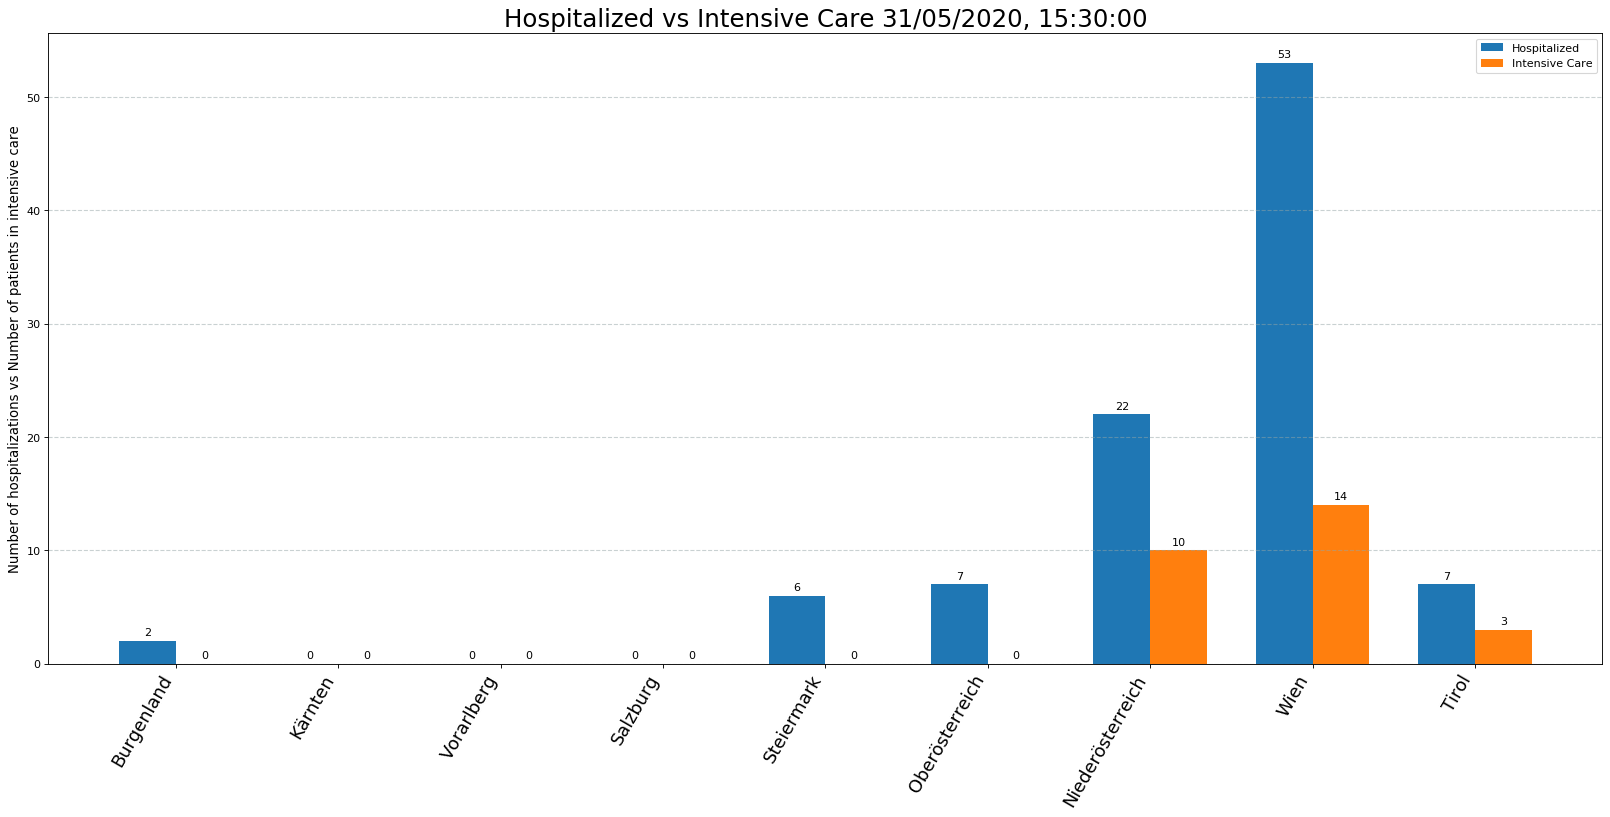

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = name
bar_1 = hospitalized
bar_2 = intensive_care

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10), dpi=80)
rects1 = ax.bar(x - width/2, bar_1, width, label='Hospitalized')
rects2 = ax.bar(x + width/2, bar_2, width, label='Intensive Care')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=60, horizontalalignment= 'right', fontsize=16)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.title("Hospitalized vs Intensive Care "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('Number of hospitalizations vs Number of patients in intensive care', fontsize= 12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/hospitalized_vs_intensive_care_2.png', dpi=300, format='png')
plt.show()

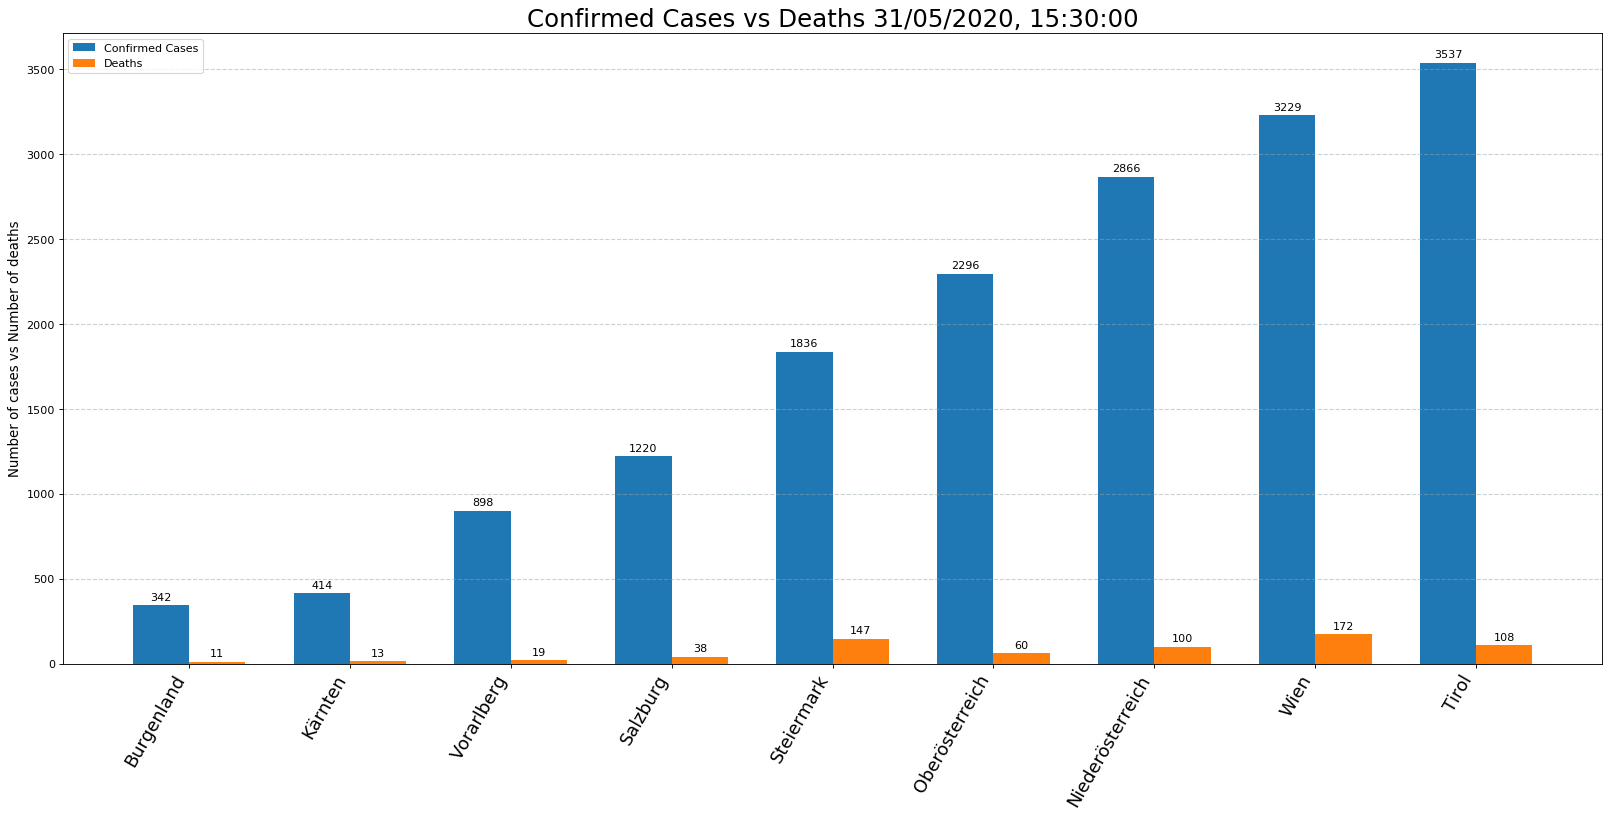

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = name
bar_1 = cases
bar_2 = deaths

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10), dpi=80)
rects1 = ax.bar(x - width/2, bar_1, width, label='Confirmed Cases')
rects2 = ax.bar(x + width/2, bar_2, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=60, horizontalalignment= 'right', fontsize=16)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


plt.title("Confirmed Cases vs Deaths "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('Number of cases vs Number of deaths', fontsize= 12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/cases_vs_deaths_2.png', dpi=300, format='png')
plt.show()

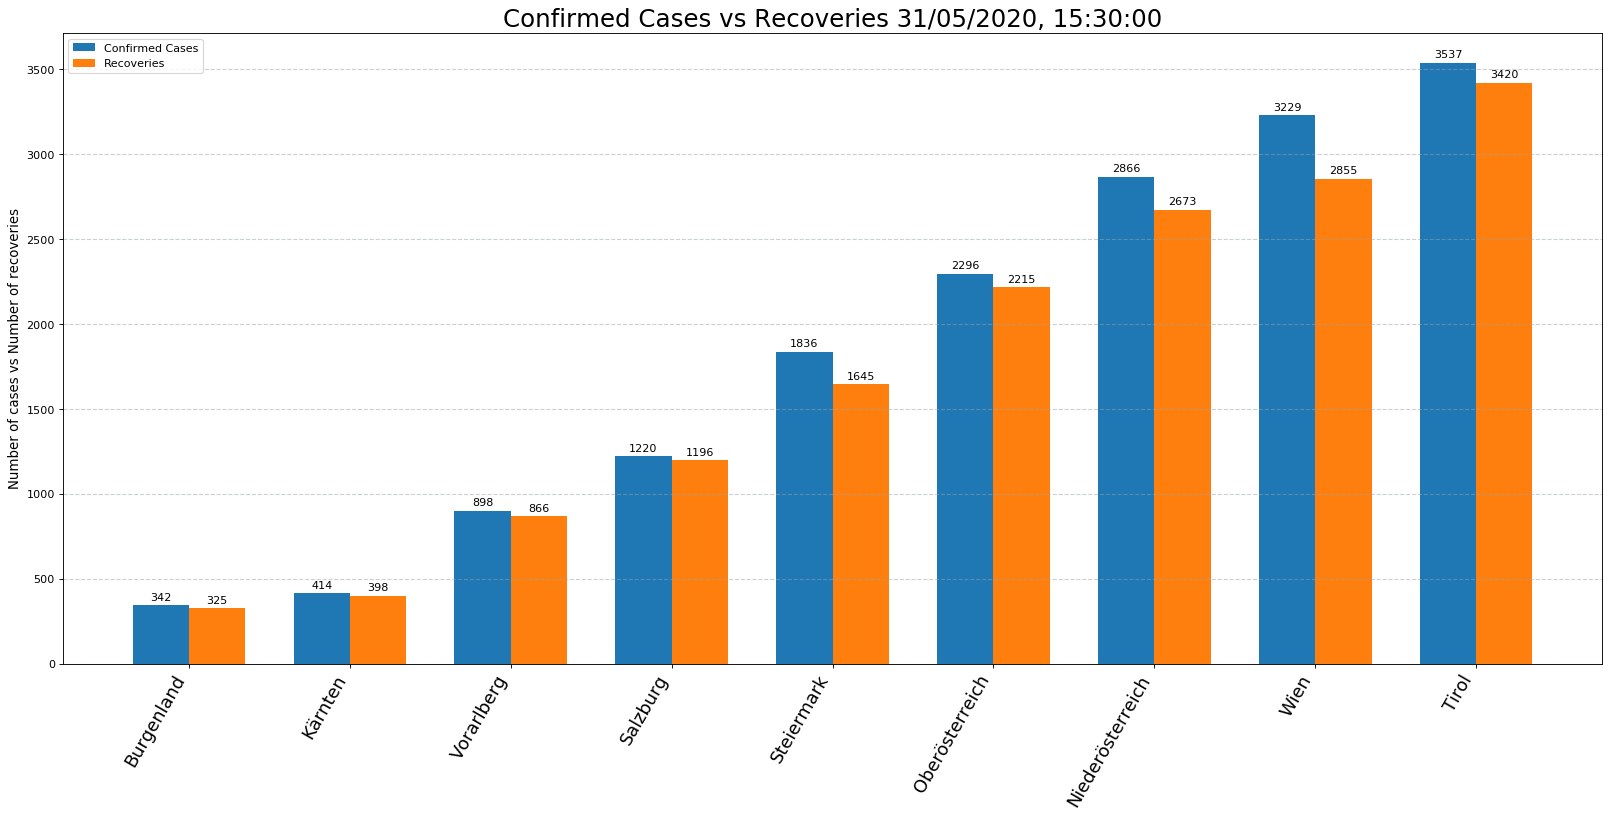

In [32]:
labels = name
bar_1 = cases
bar_2 = recovered

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10), dpi=80)
rects1 = ax.bar(x - width/2, bar_1, width, label='Confirmed Cases')
rects2 = ax.bar(x + width/2, bar_2, width, label='Recoveries')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=60, horizontalalignment= 'right', fontsize=16)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


plt.title("Confirmed Cases vs Recoveries "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('Number of cases vs Number of recoveries', fontsize= 12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/cases_vs_recovered_2.png', dpi=300, format='png')
plt.show()

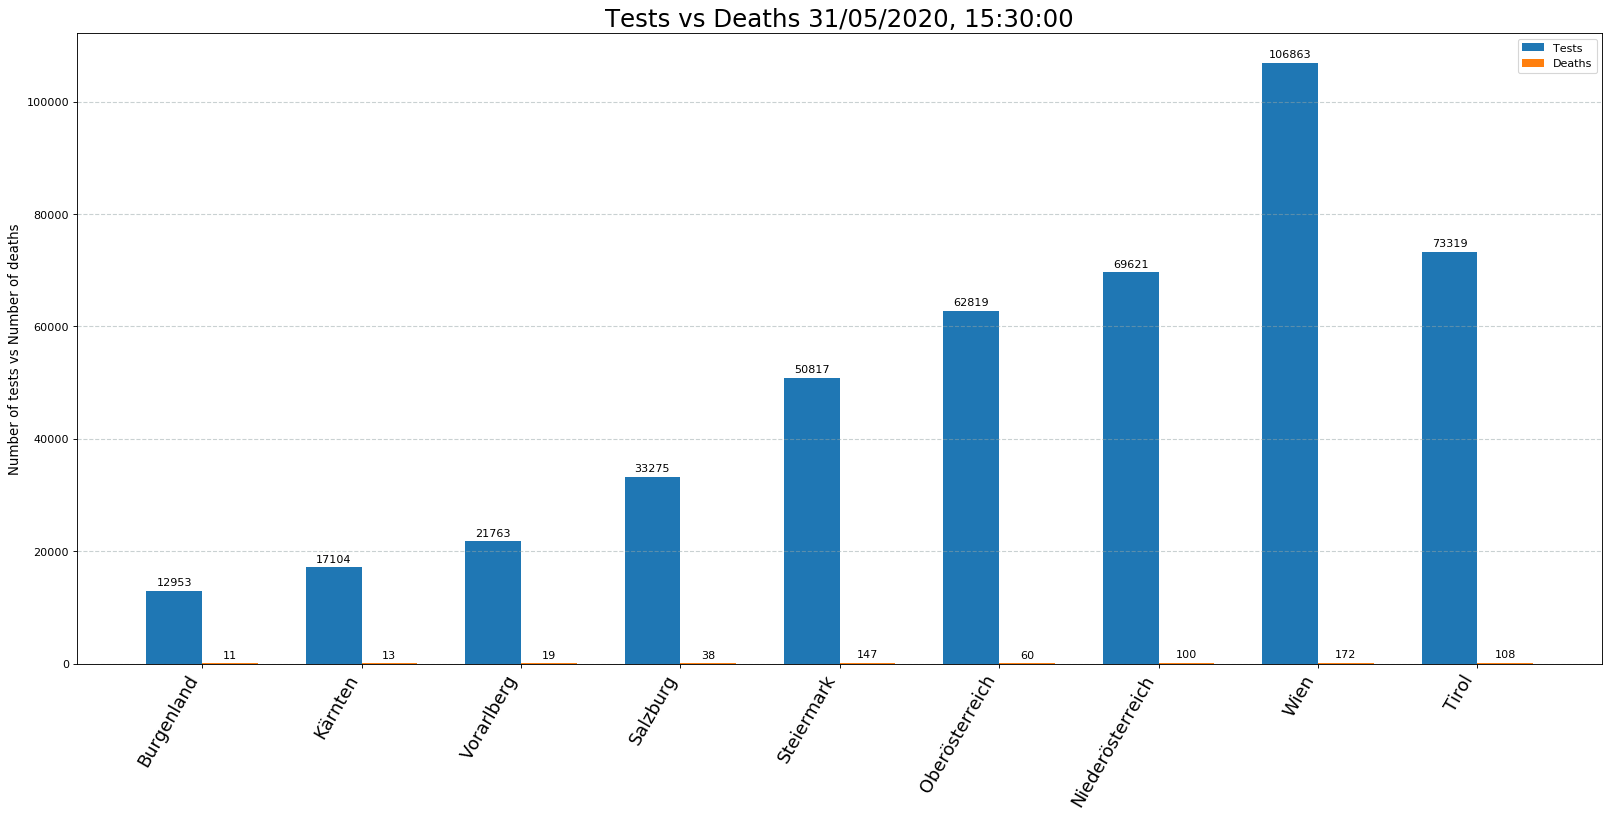

In [33]:
labels = name
bar_1 = tests
bar_2 = deaths

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10), dpi=80)
rects1 = ax.bar(x - width/2, bar_1, width, label='Tests')
rects2 = ax.bar(x + width/2, bar_2, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=60, horizontalalignment= 'right', fontsize=16)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


plt.title("Tests vs Deaths "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('Number of tests vs Number of deaths', fontsize= 12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/tests_vs_deaths_2.png', dpi=300, format='png')
plt.show()

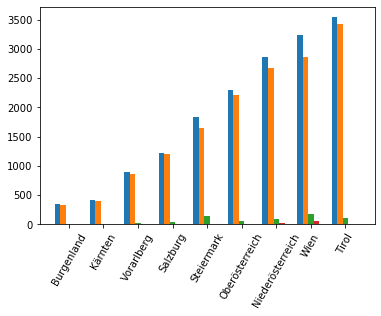

In [34]:
import numpy as np
import matplotlib.pyplot as plt

X = name
bar_1 = tests
bar_2 = cases
bar_3 = recovered
bar_4 = deaths
bar_5 = hospitalized
bar_6 = intensive_care

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
    plt.xticks(_X, X, rotation=60)
    
subcategorybar(X, [bar_2, bar_3, bar_4, bar_5, bar_6])

plt.show()

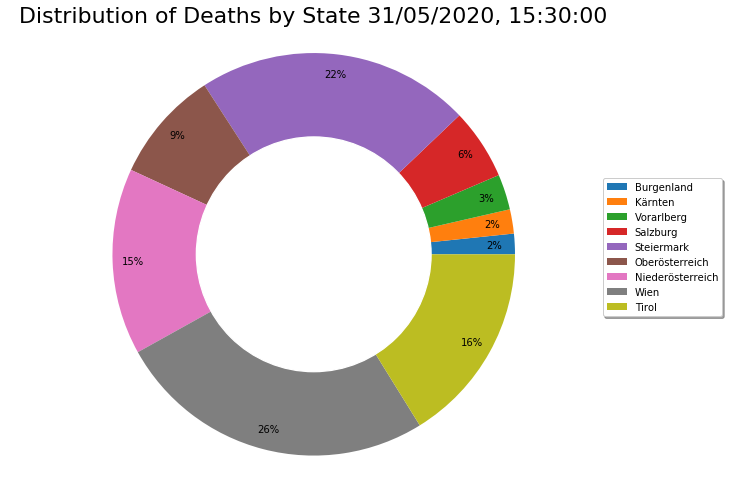

In [47]:
values = deaths
labels = names


plt.subplots(figsize=(10,8))
plt.gca().axis("equal")
pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title("Distribution of Deaths by State "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure, shadow=True)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.7,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('images/pie_deaths.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close()

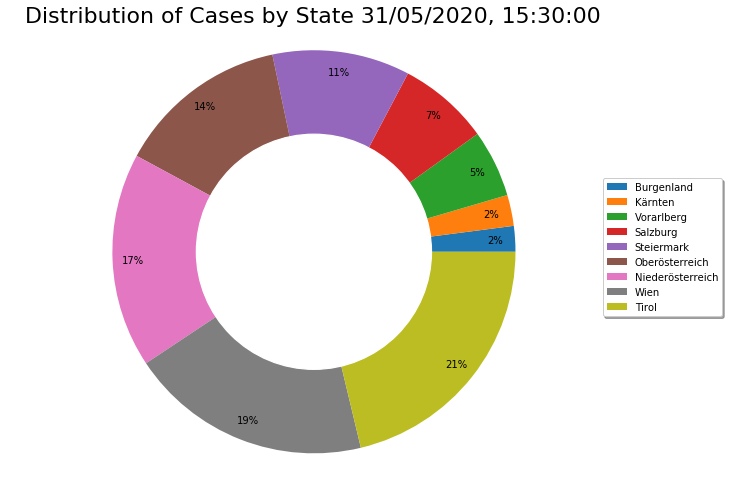

In [49]:
values = cases
labels = names


plt.subplots(figsize=(10,8))
plt.gca().axis("equal")
pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title("Distribution of Cases by State "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure, shadow=True)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.7,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('images/pie_cases.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close()

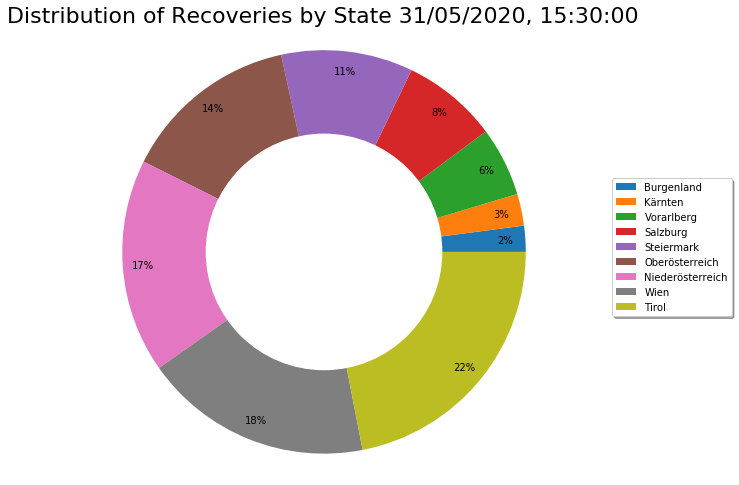

In [50]:
values = recovered
labels = names


plt.subplots(figsize=(10,8))
plt.gca().axis("equal")
pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title("Distribution of Recoveries by State "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure, shadow=True)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.7,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('images/pie_recovered.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close()

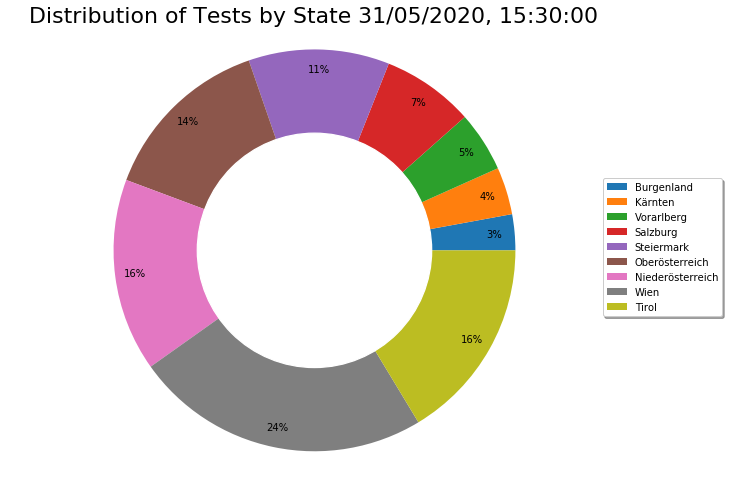

In [51]:
values = tests
labels = names


plt.subplots(figsize=(10,8))
plt.gca().axis("equal")
pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title("Distribution of Tests by State "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure, shadow=True)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.7,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('images/pie_tests.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close()

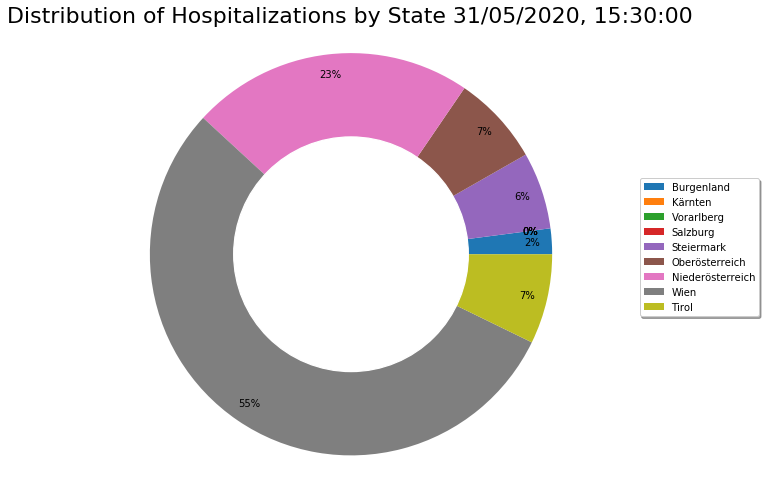

In [52]:
values = hospitalized
labels = names


plt.subplots(figsize=(10,8))
plt.gca().axis("equal")
pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title("Distribution of Hospitalizations by State "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure, shadow=True)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.7,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('images/pie_hospitalized.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close()

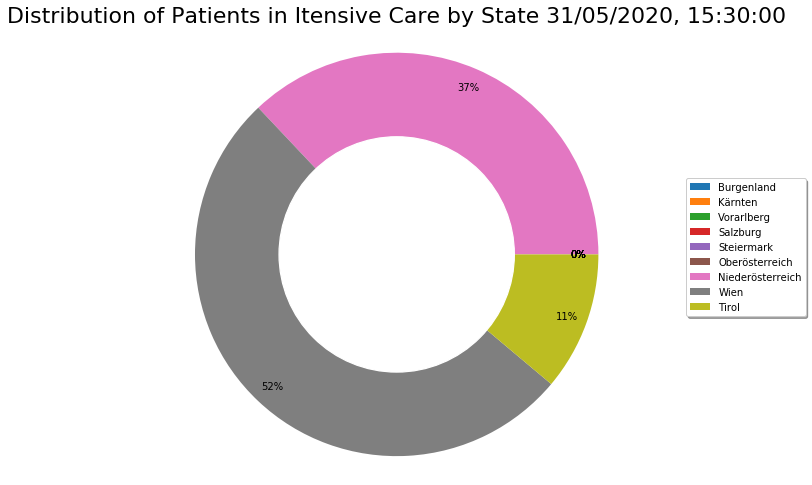

In [53]:
values = intensive_care
labels = names


plt.subplots(figsize=(10,8))
plt.gca().axis("equal")
pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title("Distribution of Patients in Itensive Care by State "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure, shadow=True)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.7,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('images/pie_intensive_care.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close()